In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
x_1 = np.ones(6)
x_2 = np.array([0.9, 3.8, 5.2, 6.1, 7.5, 9.6])
y   = np.array([0.1, 1.2, 2.1, 1.1, 1.5, 1.2]).reshape(6,1)
M = np.column_stack((x_1 , x_2))
w=np.linalg.solve(np.dot(M.T,M),np.dot(M.T,y) )
w

array([[0.55102814],
       [0.1176384 ]])

In [2]:
variance=np.sum((y-np.dot(M,w))**2)/6
variance

0.24883121819630927

In [3]:
sigma = np.sqrt(variance)
sigma

0.4988298489428126

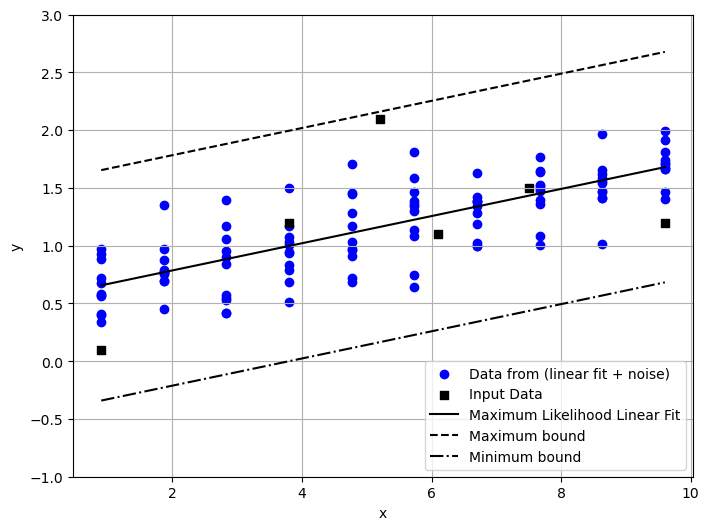

In [7]:
plt.figure(figsize=(8, 6))
m=10
x_2_data=np.linspace(0.9,9.6,10)
x_1_data=np.ones(10)
M_data = np.column_stack((x_1_data , x_2_data))
s=np.random.normal(0, variance, 10)
plt.scatter(x_2_data,(np.dot(M_data,w).T+s).reshape(10),color='blue', label='Data from (linear fit + noise)')
for i in range(m):
    s=np.random.normal(0, variance, 10)
    plt.scatter(x_2_data,(np.dot(M_data,w).T+s).reshape(10),color='blue')
    
plt.scatter(x_2,y ,color='black',marker='s', label='Input Data')
plt.plot(x_2,np.dot(M,w)  ,'-k',label='Maximum Likelihood Linear Fit')
plt.plot(x_2,np.dot(M,w)+2*sigma  ,'--k',label='Maximum bound')
plt.plot(x_2,np.dot(M,w)-2*sigma  ,'-.k',label='Minimum bound')

plt.ylim(-1, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
x_1 = np.ones(6)
x_2 = np.array([0.9, 3.8, 5.2, 6.1, 7.5, 9.6])
y   = np.array([0.1, 1.2, 2.1, 1.1, 1.5, 1.2]).reshape(6,1)
sigma_2=1
X = np.column_stack((x_1 , x_2))

In [11]:
np.dot(X.T,X)

array([[  6.  ,  33.1 ],
       [ 33.1 , 227.91]])

In [13]:
A = np.dot(X.T,X)+np.eye(2,2)
A

array([[  7.  ,  33.1 ],
       [ 33.1 , 228.91]])

In [15]:
A_inv=np.linalg.inv(A)
np.dot(A_inv,np.dot(X.T,y))

array([[0.30980543],
       [0.15200489]])

In [17]:
np.dot(X[0,:],np.dot(A_inv,X[0,:].T))+sigma_2

1.345331123214145

In [19]:
np.dot(X,np.dot(A_inv,np.dot(X.T,y)))

array([[0.44660984],
       [0.88742403],
       [1.10023088],
       [1.23703528],
       [1.44984213],
       [1.76905241]])

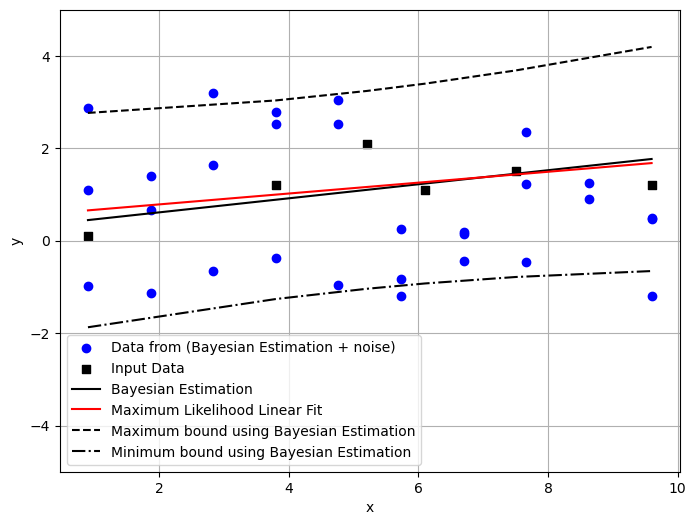

In [21]:
plt.figure(figsize=(8, 6))
m=2
x_2_data=np.linspace(0.9,9.6,10)
x_1_data=np.ones(10)
M_data = np.column_stack((x_1_data , x_2_data))
variance_data=np.zeros(10)
noise_data=np.zeros(10)
for i in range(10):
   variance_data[i]= np.dot(M_data[i,:],np.dot(A_inv,M_data[i,:].T))+sigma_2
   noise_data[i]= np.random.normal(0, variance_data[i], 1)[0]


plt.scatter(x_2_data, np.dot(M_data,np.dot(A_inv,np.dot(X.T,y))).reshape(10)+noise_data ,color='blue', label='Data from (Bayesian Estimation + noise)')
for i in range(m):
    for i in range(10):
      variance_data[i]= np.dot(M_data[i,:],np.dot(A_inv,M_data[i,:].T))+sigma_2
      noise_data[i]= np.random.normal(0, variance_data[i], 1)[0]
    plt.scatter(x_2_data, np.dot(M_data,np.dot(A_inv,np.dot(X.T,y))).reshape(10)+noise_data,color='blue')
    
variance_input_data=np.zeros(6)
sqrt_variance_input_data=np.zeros(6)
for i in range(6):
   variance_input_data[i]= np.dot(X[i,:],np.dot(A_inv,X[i,:].T))+sigma_2
   sqrt_variance_input_data[i]=np.sqrt(variance_input_data[i])
    
plt.scatter(x_2,y ,color='black',marker='s', label='Input Data')
plt.plot(x_2,np.dot(X,np.dot(A_inv,np.dot(X.T,y)))  ,'-k',label='Bayesian Estimation')
plt.plot(x_2,np.dot(M,w)  ,'-r',label='Maximum Likelihood Linear Fit')
plt.plot(x_2,np.dot(X,np.dot(A_inv,np.dot(X.T,y))).reshape(6)  +2*sqrt_variance_input_data  ,'--k',label='Maximum bound using Bayesian Estimation')
plt.plot(x_2,np.dot(X,np.dot(A_inv,np.dot(X.T,y))).reshape(6)  -2*sqrt_variance_input_data ,'-.k',label='Minimum bound using Bayesian Estimation')

plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
noise_data

array([-1.4356752 ,  0.07007904, -1.4028422 , -1.25784365,  1.4997153 ,
       -2.00691429, -1.75992541, -1.94511502, -0.37593246, -1.28287561])

In [25]:
np.random.normal(0, variance_data[1], 1)[0]

0.7330483270277137

In [27]:
np.dot(X.T,X)

array([[  6.  ,  33.1 ],
       [ 33.1 , 227.91]])

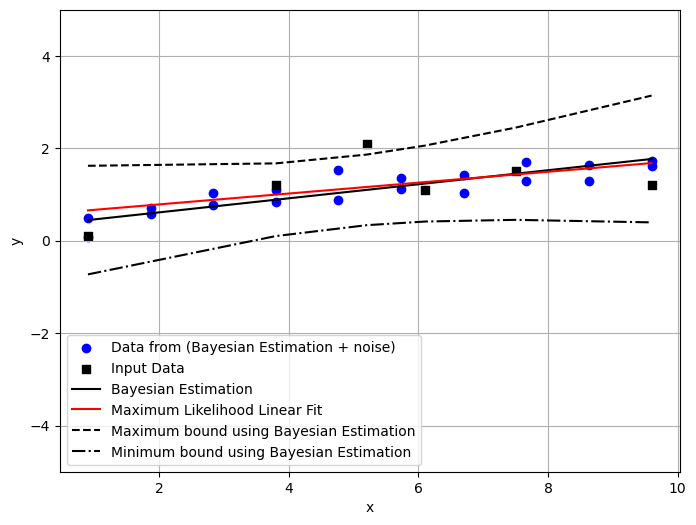

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import math
x_1 = np.ones(6)
x_2 = np.array([0.9, 3.8, 5.2, 6.1, 7.5, 9.6])
y   = np.array([0.1, 1.2, 2.1, 1.1, 1.5, 1.2]).reshape(6,1)
M = np.column_stack((x_1 , x_2))
w=np.linalg.solve(np.dot(M.T,M),np.dot(M.T,y) )
sigma = 1
X = np.column_stack((x_1 , x_2))
A = np.dot(X.T,X)+np.eye(2,2)
A_inv=np.linalg.inv(A)
plt.figure(figsize=(8, 6))
#m=2
x_2_data=np.linspace(0.9,9.6,10)
x_1_data=np.ones(10)
M_data = np.column_stack((x_1_data , x_2_data))
variance_data=np.zeros(10)
noise_data=np.zeros(10)
for i in range(10):
   variance_data[i]= np.dot(M_data[i,:],np.dot(A_inv,M_data[i,:].T))
   noise_data[i]= np.random.normal(0, variance_data[i], 1)[0]


plt.scatter(x_2_data, np.dot(M_data,np.dot(A_inv,np.dot(X.T,y))).reshape(10)+noise_data ,color='blue', label='Data from (Bayesian Estimation + noise)')
#for i in range(m):
for i in range(10):
  variance_data[i]= np.dot(M_data[i,:],np.dot(A_inv,M_data[i,:].T))
  noise_data[i]= np.random.normal(0, variance_data[i], 1)[0]
plt.scatter(x_2_data, np.dot(M_data,np.dot(A_inv,np.dot(X.T,y))).reshape(10)+noise_data,color='blue')
    
variance_input_data=np.zeros(6)
sqrt_variance_input_data=np.zeros(6)
for i in range(6):
   variance_input_data[i]= np.dot(X[i,:],np.dot(A_inv,X[i,:].T))
   sqrt_variance_input_data[i]=np.sqrt(variance_input_data[i])
    
plt.scatter(x_2,y ,color='black',marker='s', label='Input Data')
plt.plot(x_2,np.dot(X,np.dot(A_inv,np.dot(X.T,y)))  ,'-k',label='Bayesian Estimation')
plt.plot(x_2,np.dot(M,w)  ,'-r',label='Maximum Likelihood Linear Fit')
plt.plot(x_2,np.dot(X,np.dot(A_inv,np.dot(X.T,y))).reshape(6)  +2*sqrt_variance_input_data  ,'--k',label='Maximum bound using Bayesian Estimation')
plt.plot(x_2,np.dot(X,np.dot(A_inv,np.dot(X.T,y))).reshape(6)  -2*sqrt_variance_input_data ,'-.k',label='Minimum bound using Bayesian Estimation')

plt.ylim(-5, 5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
M_data

array([[1.        , 0.9       ],
       [1.        , 1.86666667],
       [1.        , 2.83333333],
       [1.        , 3.8       ],
       [1.        , 4.76666667],
       [1.        , 5.73333333],
       [1.        , 6.7       ],
       [1.        , 7.66666667],
       [1.        , 8.63333333],
       [1.        , 9.6       ]])

In [17]:
A_inv

array([[ 0.45171284, -0.06531692],
       [-0.06531692,  0.01381324]])